# Review of Image Processing Concepts

This notebook introduces some of the image processing algorithms/functions that are used throughout these interactive sessions.

## Goals

* Introduce image processing using OpenCV

## References

**[OpenCV](https://docs.opencv.org/3.4.3/)**

## Introduction <a class="anchor" id="introduction"></a>

### What is a pixel?

A pixel is a picture element. [Merriam Webster](https://www.merriam-webster.com/dictionary/pixel) defines pixel as:
> any of the small discrete elements that together constitute an image.

Usually pixels are built of channels, in the case of color images there are three channels Red, Blue and Green (RGB). Each pixel is a discrete representation of the light intensity for a particular channel. The light intensity is encoded in 8-bit, hence only 256 discrete values are possible per channel.

Sometimes, you may find images with the alpha channel. This channel handles transparency, we will omit this channel for the sake of simplicity.

Run the next cell and then click on the blue box. Interact with the color picker and observe the light intensity for each channel.

In [1]:
import ipywidgets as widgets

widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

### How many colors can a pixel represent?

A color pixel is built of three channels, each pixel channel can represent 256 values. So, a color pixel can represent 256 x 256 x 256 = 16,777,256 different colors.

### What is an image?

An image is a collection of pixels, where each pixel stores a value proportional to the light intensity at that particular location. The size of an image is its dimension (or resolution) which is specified in width and hight. For instance, 1920x1080

### What does the term frames per second refer to?

In a video the term frames per second (FPS), or images per second, represents the number of images that are played every second. The higher the image resolution and/or FPS the better the hardware required to record, process and reproduce video. [Graphic Process Units (GPU)](https://en.wikipedia.org/wiki/Graphics_processing_unit) are dedicated hardware to render high frame per second applications (for instance games).

## OpenCV <a class="anchor" id="opencv"></a>

[OpenCV](https://opencv.org/) is an open source cross platform computer vision library. In the remainder of this notebook, you will be using OpenCV to get familiar with some of the computer vision functions.

Import numpy, OpenCV and matplotlib to visualize images. We will use a mosaic image to demonstrate the effect of some vision operation to such image.

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

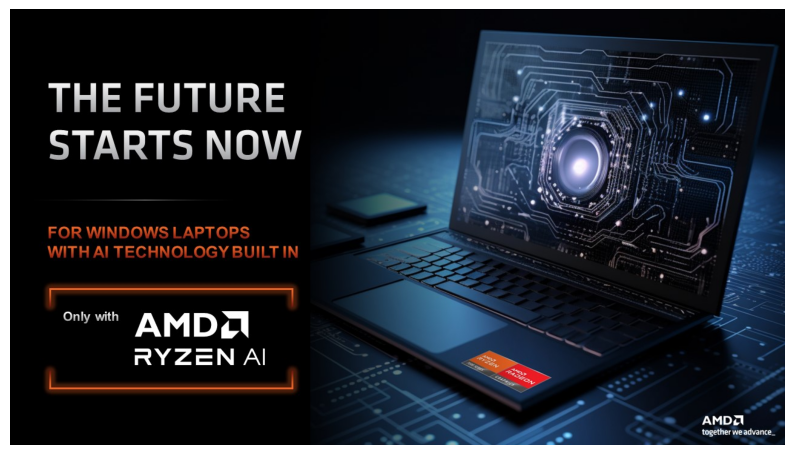

In [3]:
img = cv.imread('./images/jpg/ryzenai_future_starts_now.jpg')
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(img[...,::-1]);

## Color Conversion <a class="anchor" id="color-conversion"></a>

A color image is represented on the [RGB color space](https://en.wikipedia.org/wiki/RGB_color_space), however there are many different color spaces. Each of them have a particular purpose. We will explore some of them.

### Grayscale

A [grayscale image](https://en.wikipedia.org/wiki/Grayscale) has only one channel which represents the amount of light that each pixel contains. One of the main purposes of grayscale images on vision applications is to detect edges on images.


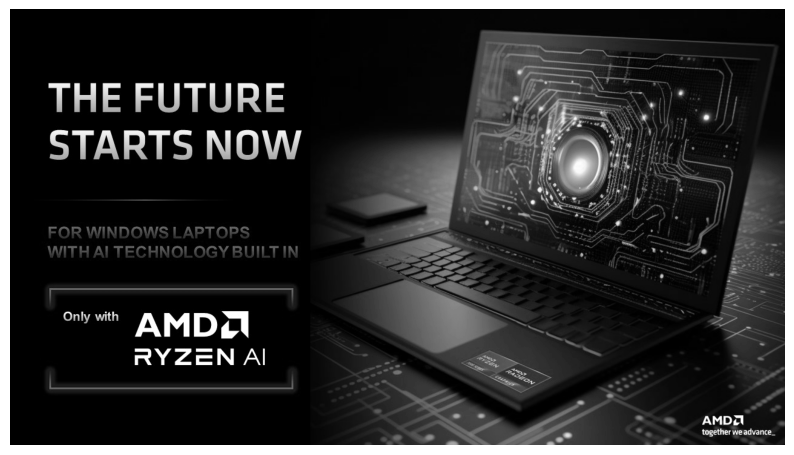

In [4]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.figure(figsize=(10, 10)), plt.axis("off"), plt.imshow(gray, cmap='gray');

### HSV Color space

[HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV) represents an image using the channels hue, saturation and value. This color space aligns a bit better to the way human perceives color-making attributes, and in vision application this color space is useful to detect colors more accurately.

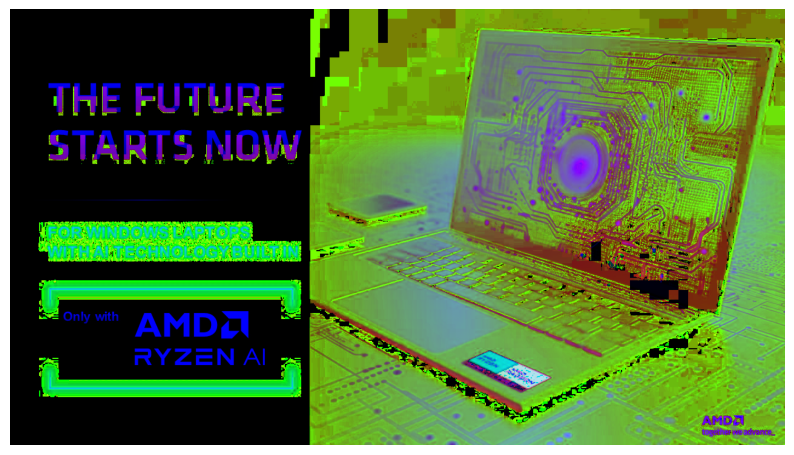

In [5]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.figure(figsize=(10, 10)), plt.axis("off"), plt.imshow(hsv);

## Color Thresholding <a class="anchor" id="color-thresholding"></a>

Produce an output image that lights up pixels with light intensity within a range.

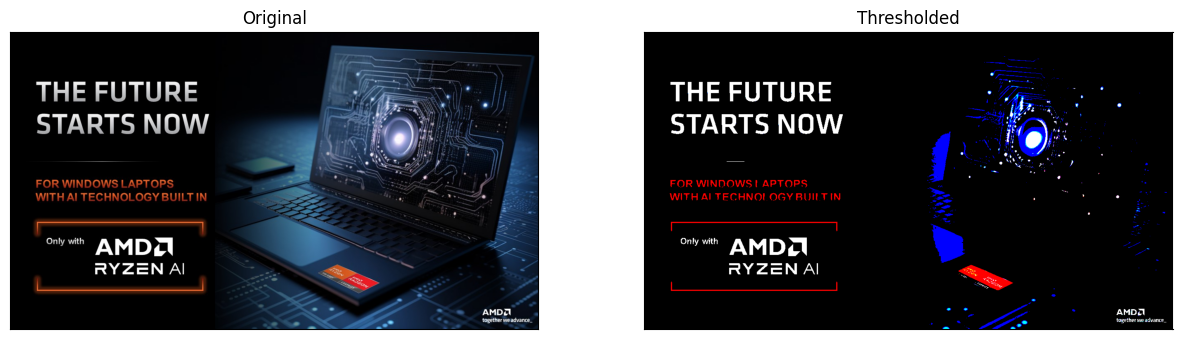

thr_b=161	thr_g=214	thr_r=108


In [6]:
# Get Random threshold values
thr_b = np.random.randint(75,188)
thr_g = np.random.randint(60,230)
thr_r = np.random.randint(50,123)
# Perform per channel thresholding
(b, g, r) = cv.split(img)
_, thr_img_b = cv.threshold(b, 150, 255, cv.THRESH_BINARY)
_, thr_img_g = cv.threshold(g, 150, 255, cv.THRESH_BINARY)
_, thr_img_r = cv.threshold(r, 150, 255, cv.THRESH_BINARY)
dst = cv.merge((thr_img_b, thr_img_g, thr_img_r))

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img[...,::-1]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst[...,::-1]),plt.title('Thresholded')
plt.xticks([]), plt.yticks([])
plt.show()
print(f'{thr_b=}\t{thr_g=}\t{thr_r=}')

## 2D Convolution <a class="anchor" id="2d-convolution"></a>

It is also know as [filter2D](https://docs.opencv.org/3.4.3/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) on OpenCV.

The 2D convolution is a mathematical operation that uses a kernel (matrix of a dimension n x n). This kernel slides over the input image and produces an output image.

In the next few cells we will consider a few 3 x 3 kernels. You can explore more kernels live [here](https://setosa.io/ev/image-kernels/)

### Identity kernel

The output of a 2D convolution using an identity kernel is the same image.

$$
Identity = \begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{bmatrix}
$$

In [7]:
identity = np.array([[0,0,0],[0,1,0],[0,0,0]],np.float32)
identity

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]], dtype=float32)

Apply the identity kernel to the image

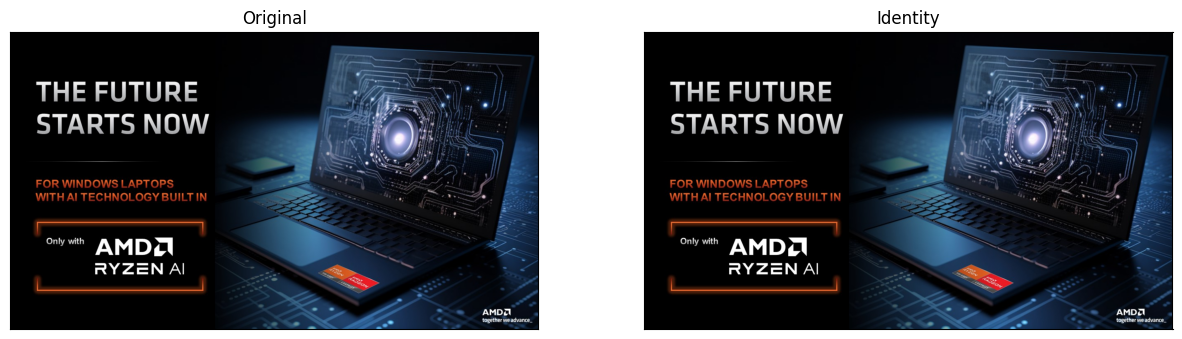

In [8]:
dst = cv.filter2D(img,-1,identity)
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img[...,::-1]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst[...,::-1]),plt.title('Identity')
plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
print("Are image the same? {}".format(np.array_equal(img,dst)))

Are image the same? True


### Emboss kernel

The output of a 2D convolution using an emboss kernel produces an image that stress the difference of pixels in a given direction given an illusion of depth.

$$
Emboss = \begin{bmatrix}
-2 & -1 & 0\\
-1 & 1 & 1\\
0 & 1 & 2
\end{bmatrix}
$$

In [10]:
emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]],np.float32)
emboss

array([[-2., -1.,  0.],
       [-1.,  1.,  1.],
       [ 0.,  1.,  2.]], dtype=float32)

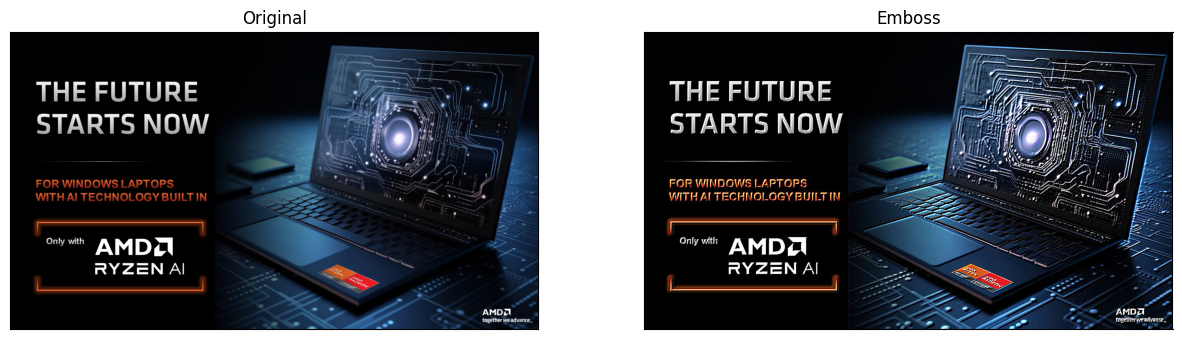

In [11]:
dst = cv.filter2D(img,-1,emboss)
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img[...,::-1]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst[...,::-1]),plt.title('Emboss')
plt.xticks([]), plt.yticks([])
plt.show()

## Morphological Transformations <a class="anchor" id="morphological-transformations"></a>

Morphological transformations are operations based on the image shape. The provided kernel decides the nature of operation. 

### Dilate

From [Wikipedia](https://en.wikipedia.org/wiki/Dilation_(morphology)):
> The dilation operation usually uses a structuring element for probing and expanding the shapes contained in the input image.

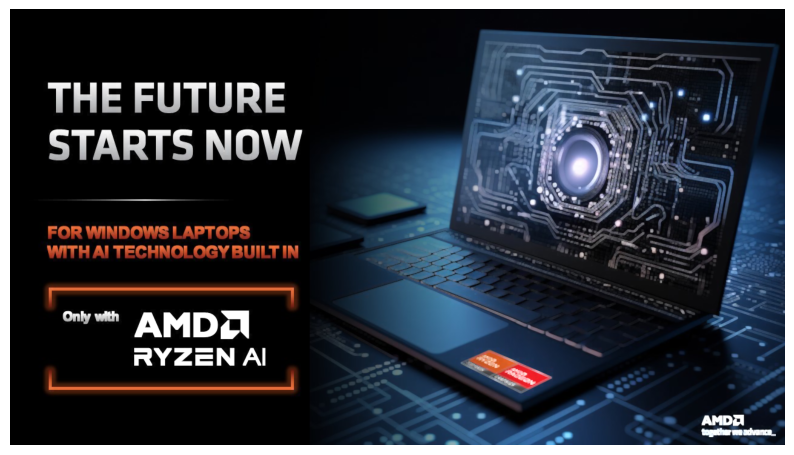

In [12]:
kernel = np.ones((3,3),np.uint8)
dilate = cv.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(10, 10)), plt.axis("off"), plt.imshow(dilate[...,::-1]);

### Erode

From [Wikipedia](https://en.wikipedia.org/wiki/Erosion_(morphology)):
> The erosion operation usually uses a structuring element for probing and reducing the shapes contained in the input image.

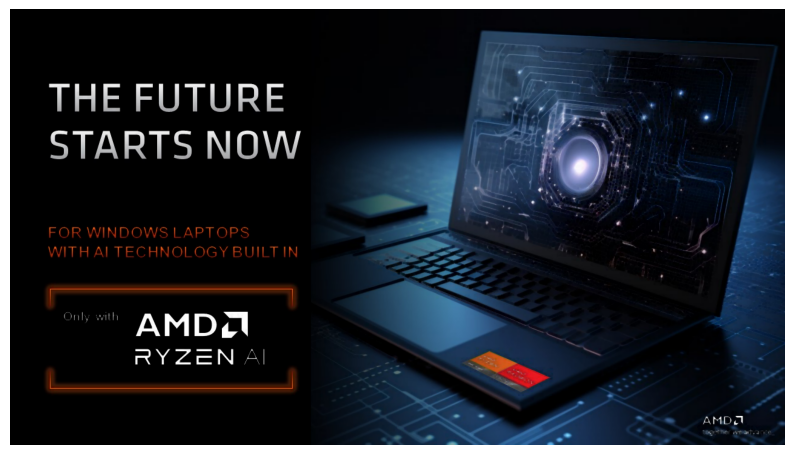

In [13]:
kernel = np.ones((3,3),np.uint8)
erode = cv.erode(img,kernel,iterations = 1)
plt.figure(figsize=(10, 10)), plt.axis("off"), plt.imshow(erode[...,::-1]);

## Duplicate Operation <a class="anchor" id="duplicate-operation"></a>

This operation simply produces two copies of the same image.

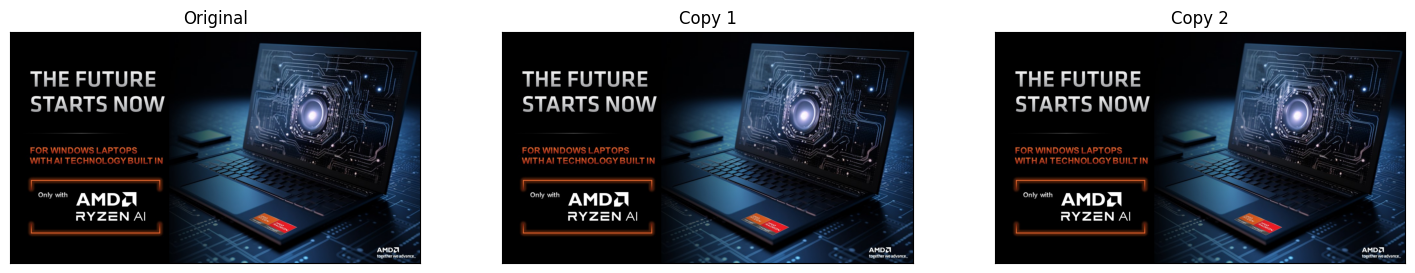

In [14]:
img2 = img.copy()
img3 = img.copy()

plt.figure(figsize=(18, 18))
plt.subplot(131),plt.imshow(img[...,::-1]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img2[...,::-1]),plt.title('Copy 1')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img3[...,::-1]),plt.title('Copy 2')
plt.xticks([]), plt.yticks([])
plt.show()

## Join Operations <a class="anchor" id="join-operations"></a>

These vision operations take two input images and produce a single one as a result.

We will generate the input images as the mosaic version after erode and dilate operations.

In [15]:
kernel = np.ones((3,3),dtype=np.uint8)
dilate = cv.dilate(img,kernel,iterations = 1)
erode = cv.erode(img,kernel,iterations = 1)

### Subtract

This function performs a pixel-wise subtraction, therefore the order of the the images matter.

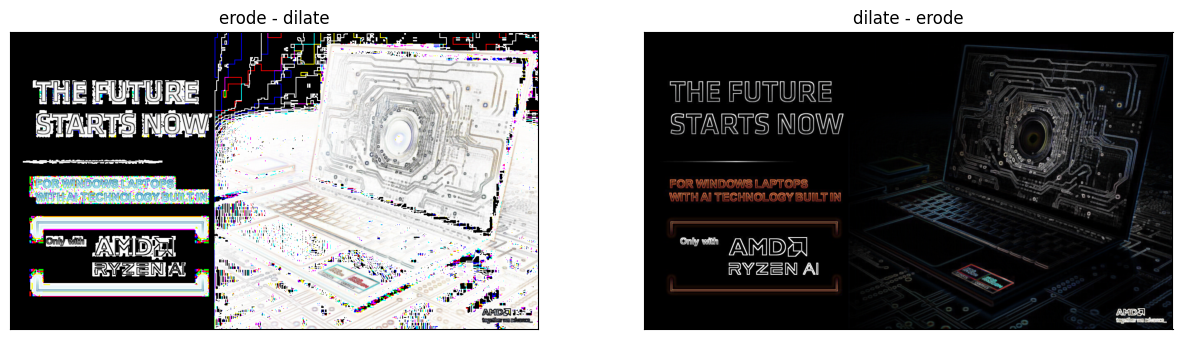

In [16]:
ed = erode - dilate
de = dilate - erode

plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(ed[...,::-1]),plt.title('erode - dilate')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(de[...,::-1]),plt.title('dilate - erode')
plt.xticks([]), plt.yticks([])
plt.show()

### Absdiff

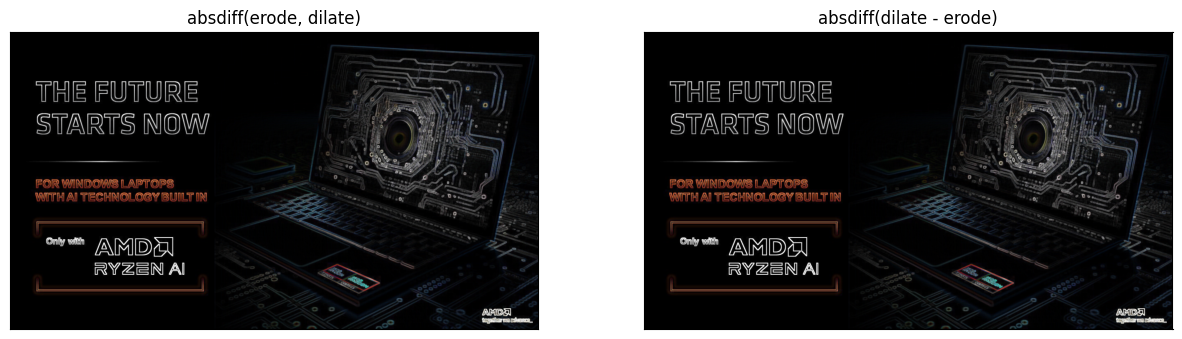

In [17]:
ed = cv.absdiff(erode, dilate)
de = cv.absdiff(dilate, erode)
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(ed[...,::-1]),plt.title('absdiff(erode, dilate)')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(de[...,::-1]),plt.title('absdiff(dilate - erode)')
plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
print("Are image the same? {}".format(np.array_equal(ed,de)))

Are image the same? True


### Add

The addition of two images can potentially lead to overflow (the result is bigger than 255). Depending on the implementation the result can either:

1. Saturate: you will notice large white areas in the image
1. Wrap around: you will notice artifacts in the result

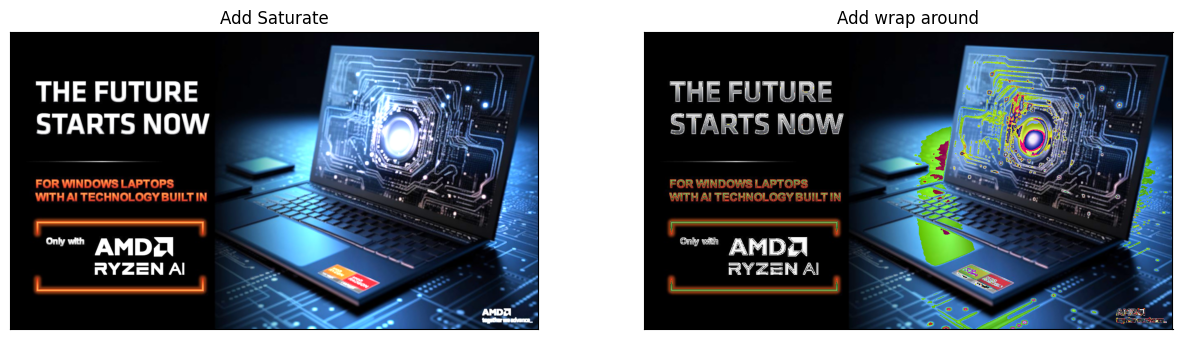

In [19]:
addsat = cv.add(erode, dilate)
addwrap = erode + dilate
plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(addsat[...,::-1]),plt.title('Add Saturate')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(addwrap[...,::-1]),plt.title('Add wrap around')
plt.xticks([]), plt.yticks([])
plt.show()

## Review <a class="anchor" id="review"></a>

After having read and used this notebook you should be able to answer the following questions:

- What is a pixel?
- What is an image?
- What is image resolution?
- What is frames per second?


## Conclusion <a class="anchor" id="conclusion"></a>

This notebooks provide a brief introduction to core concepts of computer vision. The OpenCV library is introduced and used to visualize some of the common computer vision functionality.

-------------

<center>

Copyright&copy; 2023 AMD, Inc

SPDX-License-Identifier: MIT

</center>